In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./polynomial_regression_data.csv')
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


(None,
             Position  Level  Salary
 0   Business Analyst      1   45000
 1  Junior Consultant      2   50000
 2  Senior Consultant      3   60000
 3            Manager      4   80000
 4    Country Manager      5  110000)

<AxesSubplot:>

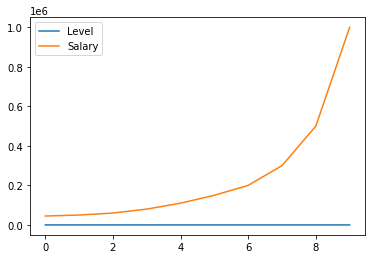

In [5]:
data.plot()

In [9]:
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values


In [10]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape 不須處理 樣本數少 且訓練資料越多越好

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(x, y)
lin_reg.score(x, y)


0.6690412331929895

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4) # 現有資料來看 degree越高 越接近y值
x_poly = poly_reg.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [39]:
lin_reg_2 = LinearRegression().fit(x_poly, y)
lin_reg_2.score(x_poly, y)

0.9973922891706614

Text(0, 0.5, 'Salary')

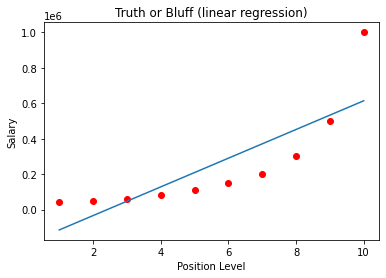

In [27]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(x))
plt.title('Truth or Bluff (linear regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

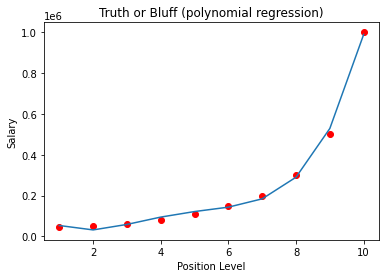

In [37]:
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)))
plt.title('Truth or Bluff (polynomial regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

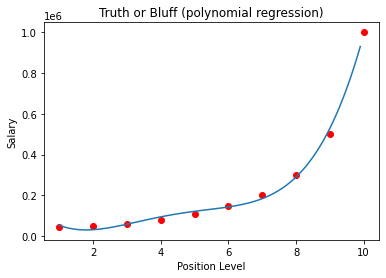

In [41]:
import numpy as np
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x, y, color='red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)))
plt.title('Truth or Bluff (polynomial regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

In [46]:
lin_reg.predict([[6.5]])

array([330378.78787879])

In [48]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])